In [1]:
!pip install -U textgenrnn

Processing /home/jovyan/.cache/pip/wheels/dc/1e/39/2ba6727a70902a872b0c391fd2d5a72a111a5295e29c0f0bcd/textgenrnn-2.0.0-py3-none-any.whl
  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl (421.8 MB)
  Using cached h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl (2.9 MB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached Keras_Preprocessing-1.1.0-py2.py3-none-any.whl (41 kB)
Processing /home/jovyan/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc/PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl
  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
Processing /home/jovyan/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6/termcolor-1.1.0-cp36-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/32/42/7f/23cae9ff6ef66798d00dc5d659088e57dbba01566f6c60db63/wrapt-1.12.1

In [2]:
from textgenrnn import textgenrnn

Using TensorFlow backend.


## Train new model - char embedding

In [3]:
textgen_char = textgenrnn(name="char_level_gary_danko_2")

In [5]:
textgen_char.reset()
textgen_char.train_from_file('../../data/clean_reviews.txt',
                        new_model=True,
                        rnn_bidirectional=True,
                        rnn_size=128,
                        rnn_layers=2,
                        dim_embeddings=300,
                        num_epochs=20,
                        max_words=1000,
                        gen_epochs=10,
                        header=False)

10 texts collected.
Training new model w/ 2-layer, 128-cell Bidirectional LSTMs
Training on 23,450 character sequences.
  ...
    to  
  ['...']
Train for 183 steps
Epoch 1/20
183/183 [==============================] - 16s 88ms/step - loss: 2.7091
Epoch 2/20
183/183 [==============================] - 10s 55ms/step - loss: 2.0893
Epoch 3/20
183/183 [==============================] - 10s 56ms/step - loss: 1.7863
Epoch 4/20
183/183 [==============================] - 10s 55ms/step - loss: 1.5474
Epoch 5/20
183/183 [==============================] - 10s 56ms/step - loss: 1.3630
Epoch 6/20
183/183 [==============================] - 10s 55ms/step - loss: 1.2162
Epoch 7/20
183/183 [==============================] - 10s 55ms/step - loss: 1.0696
Epoch 8/20
183/183 [==============================] - 10s 55ms/step - loss: 0.9400
Epoch 9/20
183/183 [==============================] - 10s 56ms/step - loss: 0.8155
Epoch 10/20
182/183 [============================>.] - ETA: 0s - loss: 0.6942###########

In [6]:
textgen_char.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 300)      18600       input[0][0]                      
__________________________________________________________________________________________________
rnn_1 (Bidirectional)           (None, 40, 256)      439296      embedding[0][0]                  
__________________________________________________________________________________________________
rnn_2 (Bidirectional)           (None, 40, 256)      394240      rnn_1[0][0]                      
____________________________________________________________________________________________

In [9]:
textgen_char.generate_samples(prefix="<s>gary_danko", max_gen_length=300)

####################
Temperature: 0.2
####################
<s>gary_danko: i literally don ' t know how to start this review because i was so ecsatic with my experience and the food here !  my boyfriend took me to gary danko for our 3-year anniversary  ( lucky me !  )  .  he made our dinner reservations for december 1st you would need to call gary danko oct

<s>gary_danko: i love the concept of gary danko ' s tasting menu .  you choose 3 ,  4 ,  or 5 courses  ( priced at $83 ,  $101 ,  and $119 )  and from there ,  you can choose whatever combination of appetizers ,  entrees ,  and cheese .  you can do that . rose wine - they only had one rose wine by 

<s>gary_danko: i literally don ' t finish .  it was cooked nicely .  if you like duck ,  you ' d probably appreciate this dish more than i would . strawberry souffle with strawberry sauce and strawberry sorbet :  i loved the beef but the real star here was the potato gnocchi .  it was pillowy soft 

####################
Temperature: 0.5


### Tranfer learning

In [13]:
textgen_char_transfer = textgenrnn(name="char_level_gary_danko_transfer")

In [14]:
textgen_char_transfer.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 100)      46500       input[0][0]                      
__________________________________________________________________________________________________
rnn_1 (LSTM)                    (None, 40, 128)      117248      embedding[0][0]                  
__________________________________________________________________________________________________
rnn_2 (LSTM)                    (None, 40, 128)      131584      rnn_1[0][0]                      
____________________________________________________________________________________________

In [7]:
textgen_char_transfer.train_from_file('../../data/clean_reviews.txt', num_epochs=20, gen_epochs=10, header=False)

10 texts collected.
Training on 23,380 character sequences.
  ...
    to  
  ['...']
Train for 182 steps
Epoch 1/20
182/182 [==============================] - 70s 383ms/step - loss: 2.3542
Epoch 2/20
182/182 [==============================] - 66s 362ms/step - loss: 2.0613
Epoch 3/20
182/182 [==============================] - 66s 363ms/step - loss: 1.8401
Epoch 4/20
182/182 [==============================] - 66s 360ms/step - loss: 1.7241
Epoch 5/20
182/182 [==============================] - 66s 360ms/step - loss: 1.6384
Epoch 6/20
182/182 [==============================] - 66s 363ms/step - loss: 1.5679
Epoch 7/20
182/182 [==============================] - 66s 361ms/step - loss: 1.5437
Epoch 8/20
182/182 [==============================] - 66s 362ms/step - loss: 1.4622
Epoch 9/20
182/182 [==============================] - 66s 361ms/step - loss: 1.4013
Epoch 10/20
181/182 [============================>.] - ETA: 0s - loss: 1.3480####################
Temperature: 0.2
####################
gar

### Losses

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})

In [11]:
loss = [
    2.7091,
    2.0893,
    1.7863,
    1.5474,
    1.3630,
    1.2162,
    1.0696,
    0.9400,
    0.8155,
    0.6949,
    0.5851,
    0.4861,
    0.3953,
    0.3208,
    0.2505,
    0.1949,
    0.1508,
    0.1184,
    0.0950,
    0.0791
]

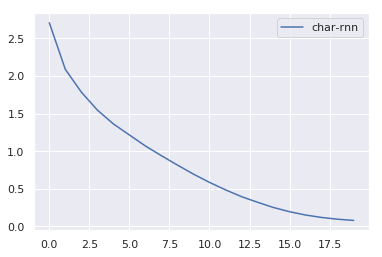

In [12]:
plt.plot(loss,  label='char-rnn')
plt.legend(loc='upper right')
plt.show()

In [4]:
loss_transfer = [
    2.3542,
    2.0613,
    1.8401,
    1.7241,
    1.6384,
    1.5679,
    1.5437,
    1.4622,
    1.4013,
    1.3480,
    1.3480,
    1.3012,
    1.2584,
    1.2168,
    1.1785,
    1.1450,
    1.1102,
    1.0806,
    1.0533,
    1.0295,
    1.0099
]

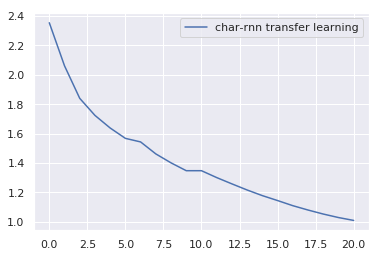

In [15]:
plt.plot(loss_transfer,  label='char-rnn transfer learning')
plt.legend(loc='upper right')
plt.show()

In [2]:
import os
os.path.join(os.path.abspath(os.getcwd()), "word_level_gary_danko_weights.hdf5")

'/home/jovyan/workspace/text-generation-ca/char-rnn/word_level_gary_danko_weights.hdf5'